In [1]:
import pandas as pd

papers = pd.read_csv('./data_face/data_group_ner.csv')
# convert type of column
papers.rename(columns={'doc_ner': 'paper_text'}, inplace=True)
papers['paper_text'].astype(str)
# Print head
# print(papers.head())
# print(papers.shape)
print(papers['paper_text'][0])
print(papers['location'][0])
print(papers['person'][0])
print(papers['organization'][0])

nan
[]
[]
[]


In [2]:
papers.head()

,post_id,text,timestamp,time,user_id,location,person,organization,paper_text
0,640719428178910,🔥CÁC KÊNH YOUTUBE HỌC CÁC MÔN🔥\nVào từng ảnh đ...,1.696861e+09,2023-10-09 21:10:58,100042024003239,[],[],[],NaN
1,659246332992886,ae malibu thua nnn chưa ạ,1.699863e+09,2023-11-13 15:06:26,284734091022087,[],[],[],NaN
2,659210466329806,đ*t cụ mấy thằng ptit ở malibu giờ đi ngủ ngậm...,1.699857e+09,2023-11-13 13:26:16,306021115550368,[' ##lib'],[],[],đ*t cụ mấy thằng ptit ở malibu giờ đi ngủ ngậm...
3,659176019666584,"kiếm mập mờ ở malibu gấp, lạnh lắm rồiiiiiii🥶",1.699850e+09,2023-11-13 11:41:09,1482440865923204,['ma ##lib ##u'],[],[],"kiếm mập mờ ở malibu gấp, lạnh lắm rồiiiiiii🥶"
4,659172869666899,Long bào đã kịp về để Tết này còn flex với họ ...,1.699850e+09,2023-11-13 11:31:56,100037648460053,[],[],[],NaN


In [3]:
import numpy as np
# duplicated
print(papers.duplicated().sum())
papers.drop_duplicates(inplace=True)

# drop nan
papers.dropna(axis=0, inplace=True, how="any")
# drop inf
papers.replace([np.inf, -np.inf], np.nan, inplace=True)
papers.replace('', np.nan, inplace=True)
papers.dropna(inplace=True,how='any',axis=0)
# Remove the columns
try:
    papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)
except:
    pass

# Print out the first rows of papers
print(papers.head())
print(papers.info())
papers.reset_index(inplace=True, drop=True)

0
            post_id                                               text  \
2   659210466329806  đ*t cụ mấy thằng ptit ở malibu giờ đi ngủ ngậm...   
3   659176019666584      kiếm mập mờ ở malibu gấp, lạnh lắm rồiiiiiii🥶   
6   659173506333502   Khong có em cũng khong sao🔥\n#Malibu ngày đông 🥶   
11  655862303331289  Có ai mê mùi nước giặt ở Thiên Thai như em khu...   
15  659151593002360                                 V ơi tớ lạnh quá 🥶   

       timestamp                 time           user_id          location  \
2   1.699857e+09  2023-11-13 13:26:16   306021115550368        [' ##lib']   
3   1.699850e+09  2023-11-13 11:41:09  1482440865923204  ['ma ##lib ##u']   
6   1.699850e+09  2023-11-13 11:34:04  1009833816917610        ['Malibu']   
11  1.699290e+09  2023-11-06 23:52:19   897989658423274    ['Thiên Thai']   
15  1.699846e+09  2023-11-13 10:27:56  3751041085124649                []   

   person organization                                         paper_text  
2      []     

In [4]:
# get timestamps
timestamps = papers.time.to_list()

In [5]:
# Load the regular expression library
import re

# Remove punctuation
papers['paper_text_processed'] = papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))
# replace \n
papers['paper_text_processed'] = papers['paper_text_processed'].map(lambda x: re.sub('\n', ' ', x))
# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
print(papers['paper_text_processed'][0])
print(papers['paper_text_processed'][1])
print(papers['paper_text_processed'][2])

đ*t cụ mấy thằng ptit ở malibu giờ đi ngủ ngậm mồm vào tắt âm đê ko ngủ để ngkhac ngủ lớn rồi ý thức lên
kiếm mập mờ ở malibu gấp lạnh lắm rồiiiiiii🥶
khong có em cũng khong sao🔥 #malibu ngày đông 🥶


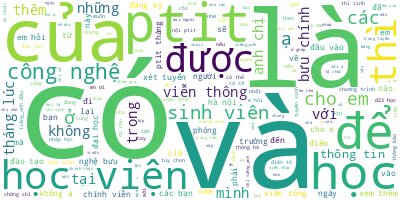

In [6]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [7]:


import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
nltk.download('punkt')
# from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from unidecode import unidecode
import string
import re
import pyvi
import json
import underthesea
from pyvi import ViTokenizer, ViPosTagger
from underthesea import word_tokenize
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
stop_words = set(open("./data_test/vietnamese-stopwords-dash.txt", "r", encoding="utf-8").read().splitlines())

def remove_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()

def remove_number(text):
    return re.sub(r'\d+', '', text).strip()

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_punctuation_not_underscore(text): # remove dấu câu để lại dấu _
    # Tạo một bản sao của string.punctuation và loại bỏ dấu _
    punctuation = string.punctuation.replace("_", "")
    # punctuation = punctuation.replace("-", "")
    return text.translate(str.maketrans('', '', punctuation))

def remove_(text):
    text = remove_punctuation_not_underscore(text)
    text = remove_number(text)
    text = re.sub(r'[\x00-\x1F\x7F-\x9F]', '', text)
    text = text.replace("_  _", "_")
    return re.sub(r'“|”', '', text).strip()
    # return ''.join(char for char in text if char not in ['“', '”'])

def remove_punctuation_underscore(text): # remove dấu _
    punctuation = "_"
    return text.translate(str.maketrans('', '', punctuation))
    
def word_to_phrase(text): # chuyển từ thành cụm từ
    # return ViTokenizer.tokenize(text)
    return word_tokenize(text, format="text")

# def sent_to_words(sentences):
#     for sentence in sentences:
#         # deacc=True removes punctuations
#         # loại bỏ dấu câu and split
#         yield([remove_(str(word)) for word in re.findall(r'\w+|\S+', word_to_phrase(str(sentence))) if remove_(str(word)) != ''])

def remove_stopwords(texts):
    words = [word for word in texts.split() if word not in stop_words]
    words_to_sentence = ' '.join(words)
    return words_to_sentence.strip()

def remove_emoj(text):
    emoj = re.compile("["
                        u"\U0001F600-\U0001F64F"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                        u"\U0001F680-\U0001F6FF"  # transport & map symbols
                        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                        u"\U00002500-\U00002BEF"  # chinese char
                        u"\U00002702-\U000027B0"
                        u"\U00002702-\U000027B0"
                        u"\U000024C2-\U0001F251"
                        u"\U0001f926-\U0001f937"
                        u"\U00010000-\U0010ffff"
                        u"\u2640-\u2642" 
                        u"\u2600-\u2B55"
                        u"\u200d"
                        u"\u23cf"
                        u"\u23e9"
                        u"\u231a"
                        u"\ufe0f"  # dingbats
                        u"\u3030"
                                    "]+", re.UNICODE)
    return re.sub(emoj, '', text)

# drop word while # in word
def remove_word_hash(text):
    # text = re.sub(r'#.*', '', text).strip() # remove word all while # before
    return re.sub(r'#\w+', '', text).strip()
# drop url
def remove_url(text):
    text = re.sub(r'http\S+', '', text).strip()
    text = re.sub(r'www\S+', '', text).strip()
    text = re.sub(r'pic\S+', '', text).strip()
    text = re.sub(r'bit.ly\S+', '', text).strip()
    text = re.sub(r'fb\S+', '', text).strip()
    text = re.sub(r'com\S+', '', text).strip()
    text = re.sub(r'https\S+', '', text).strip()
    return text

# drop email
def remove_email(text):
    # \S kí tự không phải khoảng trắng
    # \S* kí tự không phải khoảng trắng xuất hiện 0 hoặc nhiều lần
    # \s? có thể có hoặc không có khoảng trắng cuối chuỗi
    return re.sub(r'\S*@\S*\s?', '', text).strip()

# scale word summary
def scale_word_summary(text):
    with open('./data_test/word_summary.json', 'r', encoding='utf-8') as f:
        word_summary = json.load(f)
    text = text.split()
    for i, word in enumerate(text):
        for key, value in word_summary.items():
            key = key.split('|')
            if word in key:
                text[i] = re.sub(r'\s+','_',value)
    return ' '.join(text)

# drop syntax
def pos_tagging_drop(text):
    list_dict = underthesea.pos_tag(text)
    list_word = []
    for i,val in list_dict:
        if val not in ['CH', 'L', 'M', 'R', 'E', 'C', 'I', 'T', 'X', 'Y']:
            list_word.append(i) # P, N, V, A, 'Np', 'Nc', 'Nu'
    return ' '.join(list_word)

# drop_special_character_in_word
def remove_special_character_in_word(text):
    text = re.sub(r'\w*[\+\-\/\*\%\=\(\)\[\]\{\}]\w*\s?', '', text).strip()
    return text

data = papers['paper_text_processed']
data = data.apply(lambda x: remove_whitespace(x)) # remove whitespace (tab, \n, \r)
data = data.apply(lambda x: scale_word_summary(x)) # scale word summary (mjk -> mình)
data = data.apply(lambda x: remove_word_hash(x)) # remove word hash (#) hashtag
data = data.apply(lambda x: remove_special_character_in_word(x)) # remove special character in word ("***dung" -> "")
data = data.apply(lambda x: pos_tagging_drop(x)) # pos tagging drop (Ngày mai, tôi sẽ đi học -> Ngày mai, tôi đi học)
data = data.apply(lambda x: remove_emoj(x)) # remove emoj (😂)
## data = data.apply(lambda x: remove_punctuation(x)) # remove punctuation (.,!?) 
data = data.apply(lambda x: remove_email(x)) # remove email (gmail.com)
data = data.apply(lambda x: remove_url(x)) # remove url (https://www.facebook.com)
data = data.apply(lambda x: remove_number(x)) # remove number (123)
## data = data.apply(lambda x: remove_punctuation_underscore(x))
data = data.apply(lambda x: word_to_phrase(x)) # word to phrase (tôi là ai -> tôi_là_ai)
data = data.apply(lambda x: remove_(x))
data = data.apply(lambda x: remove_stopwords(x))

print(data[0])
print(data[1])
print(data[2])

# print(remove_stopwords(text))
docs = data.tolist()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/minhthuy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/minhthuy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


cụ thằng malibu đi ngủ ngậm mồm tắt_âm đê ngủ ngủ ý_thức
kiếm mập_mờ malibu gấp lạnh rồiiiiiii
đông


In [8]:
from top2vec import Top2Vec
import tensorflow_text
model = Top2Vec(docs,speed="learn", workers=8)

/home/minhthuy/anaconda3/envs/bertopic/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-11-16 10:43:34.420529: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-16 10:43:34.459951: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-16 10:43:34.460006: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-16 10:43:34.461533: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for

In [9]:
print('get num topics: ',model.get_num_topics())

get num topics:  3


In [14]:
topic_sizes, topic_nums = model.get_topic_sizes()
print('topic_sizes: ',topic_sizes)
print('topic_nums: ',topic_nums)

topic_sizes:  [865  64  39]
topic_nums:  [0 1 2]


In [11]:
# topic_words, word_scores, topic_nums = model.get_topics(1)
# print('topic_words: ',topic_words)
# print('word_scores: ',word_scores)
# print('topic_nums: ',topic_nums)

topic_words:  [['đai_hoc' 'đang_ky' 'đao_tao' 'đi' 'đo' 'đoi' 'đau_vao' 'vien_thong'
  'chuong_trinh' 'thi_sinh' 'tieng_anh' 'ha_noi' 'buu_chinh' 'thong_tin'
  'tuyen_sinh' 'phong' 'cong_nghe' 'anh_chi' 'truong' 'chung_chi' 'nganh'
  'cau_lac_bo' 'thi' 'sinh_vien' 'hoc' 'hoc_vien' 'xet' 'xet_tuyen'
  'tuyen']]
word_scores:  [[0.67602146 0.6717793  0.64765364 0.6173084  0.61357355 0.59930074
  0.5656479  0.5365683  0.50587904 0.4883855  0.4811774  0.4549696
  0.42268097 0.42262238 0.40916634 0.39911407 0.38354638 0.36941415
  0.3679723  0.3578681  0.35505497 0.35497284 0.34722963 0.3446551
  0.3408365  0.3105077  0.2844194  0.27317455 0.25946626]]
topic_nums:  [0]


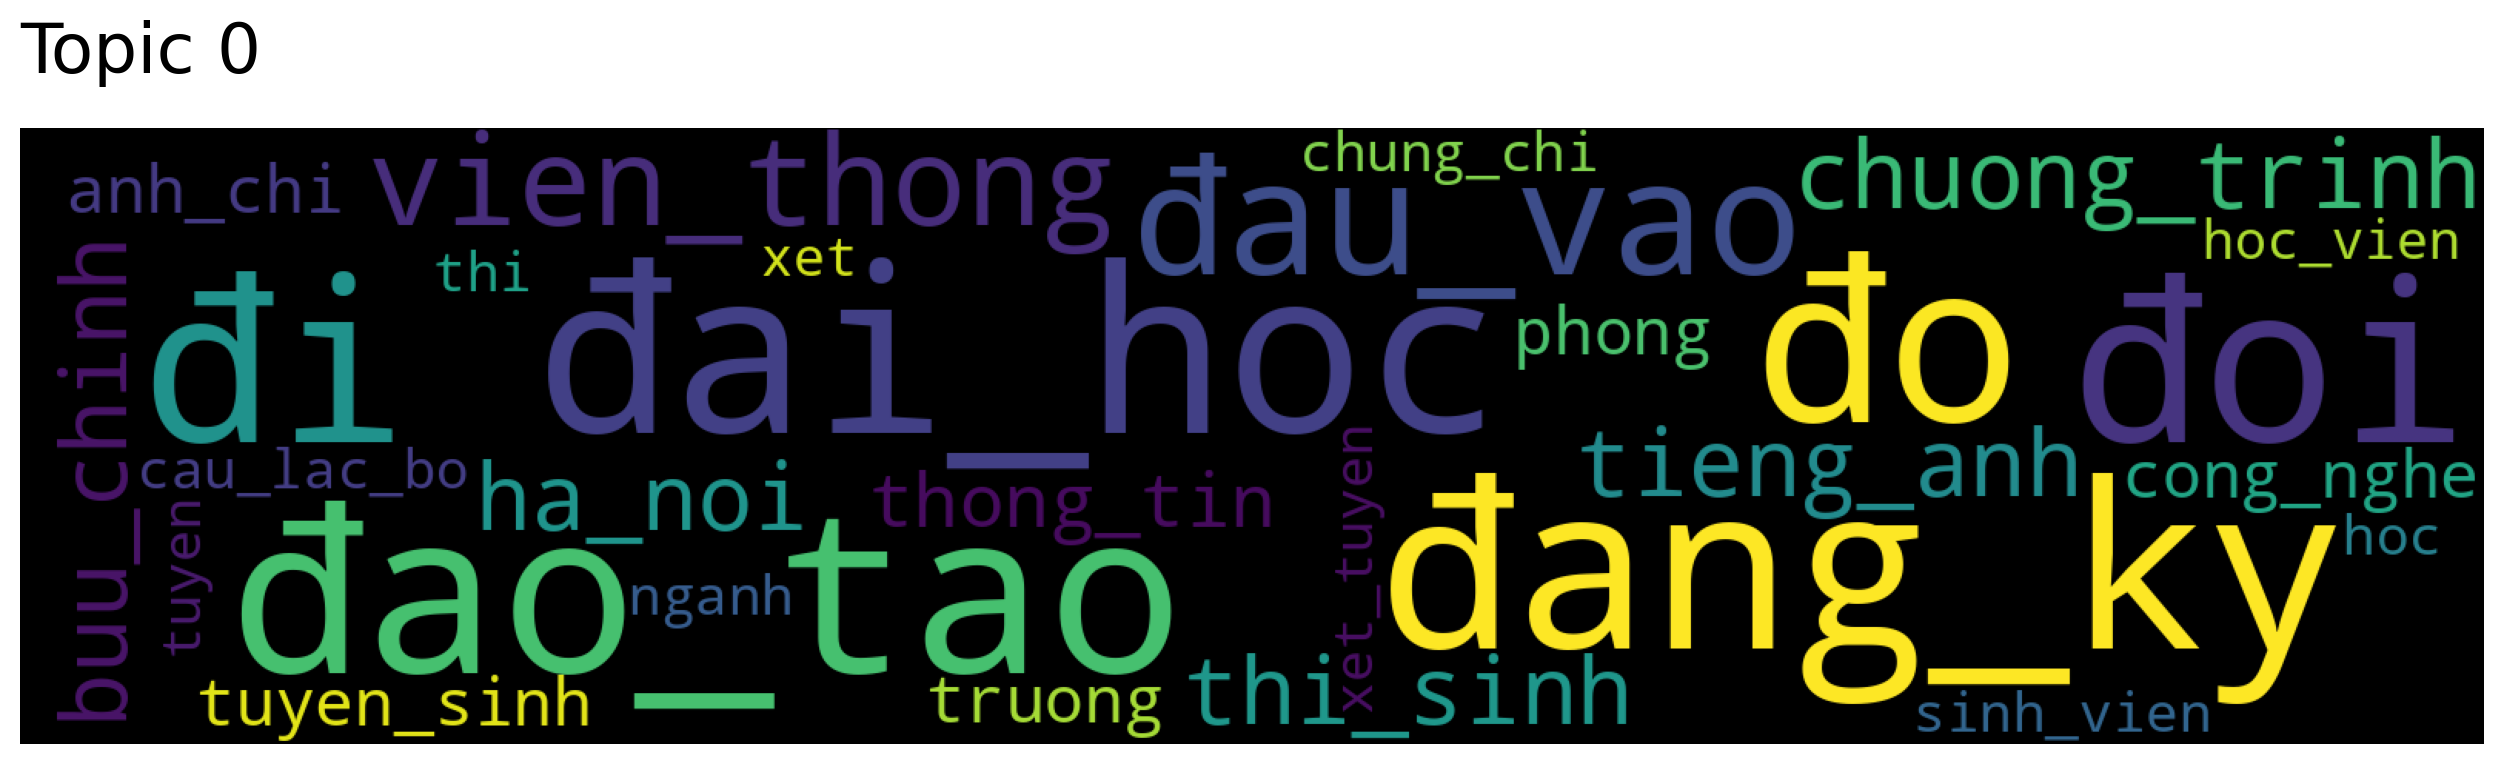

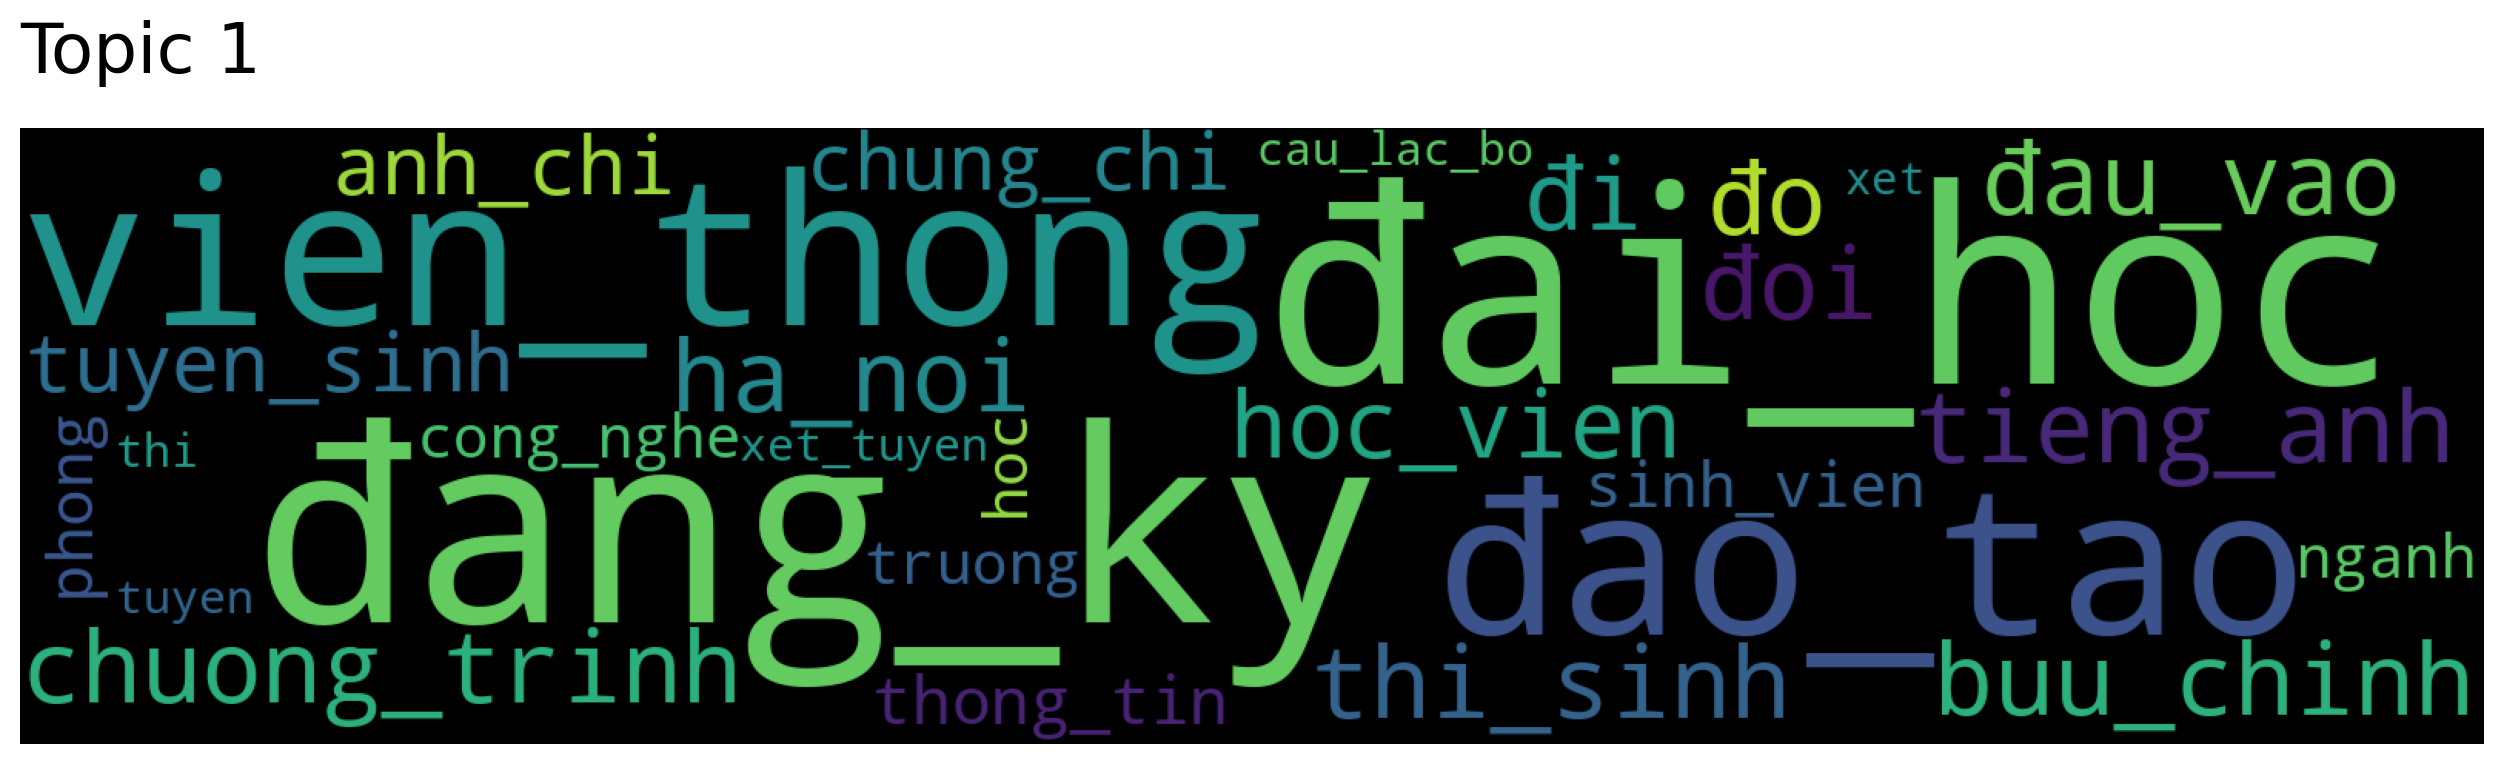

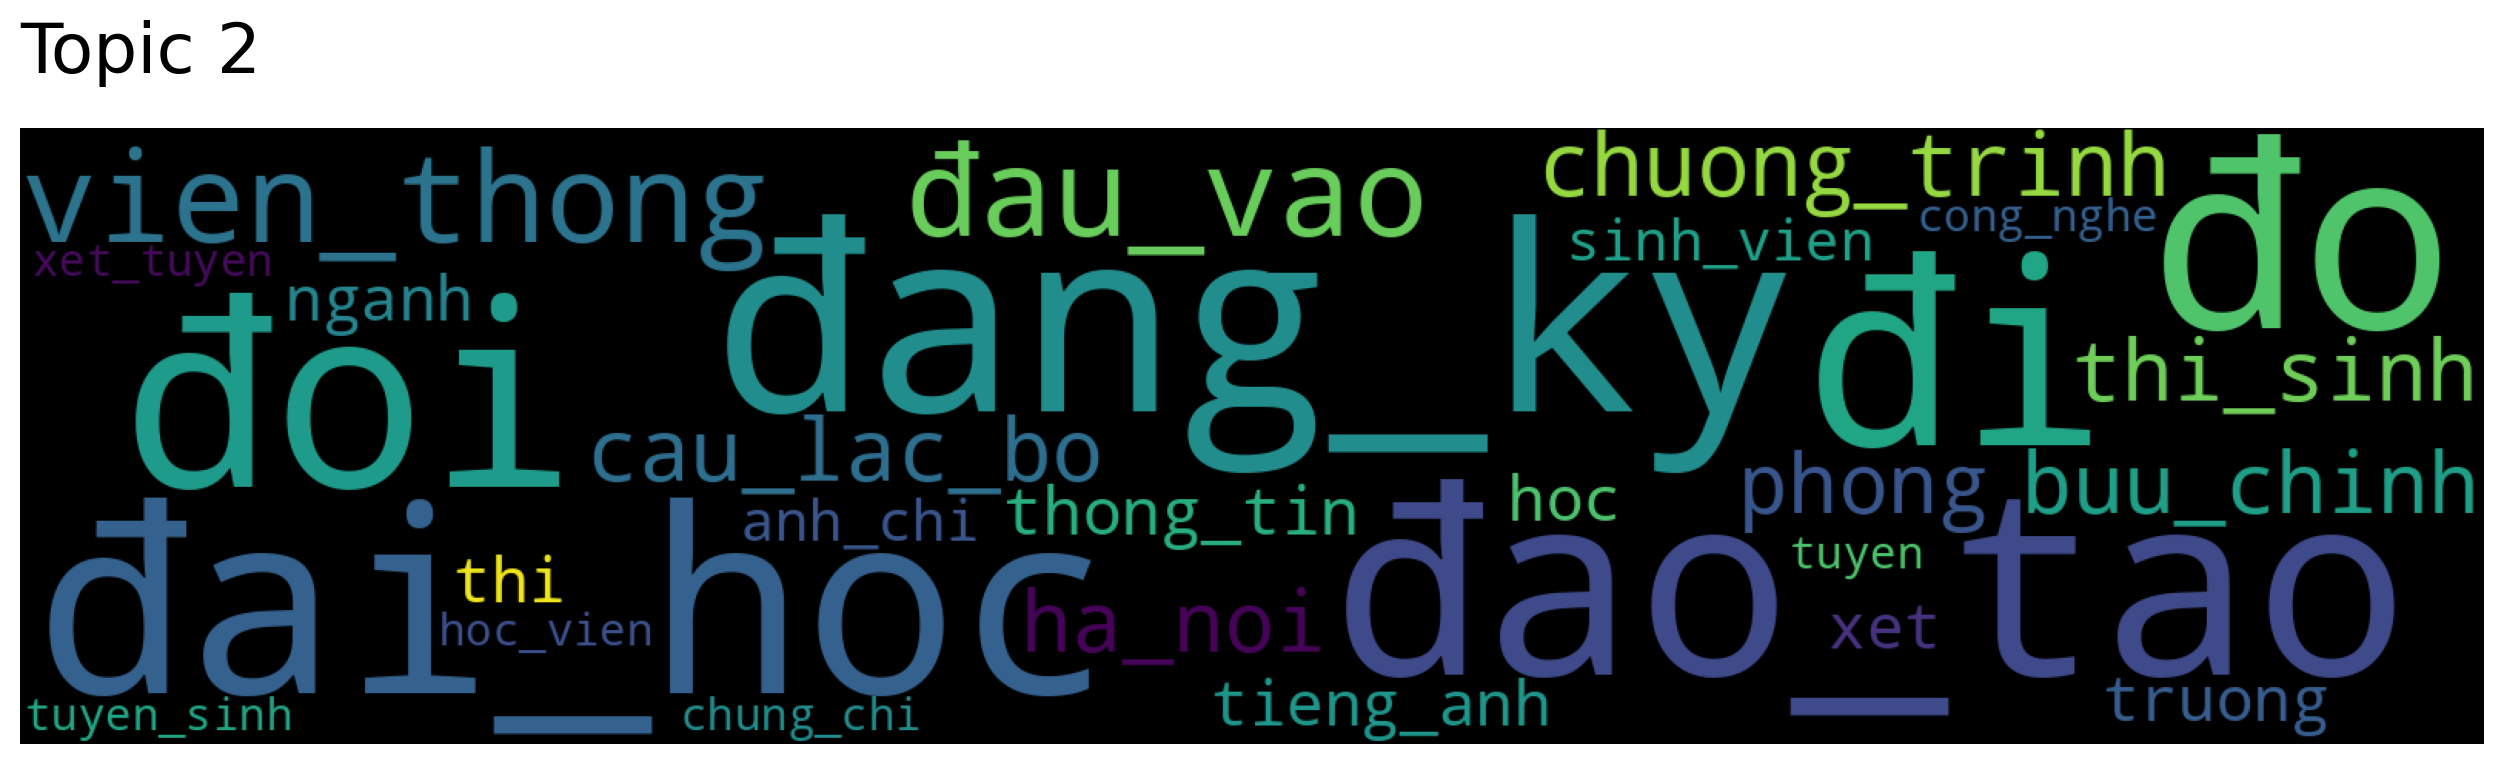

In [15]:
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)